Suppose we want some random numbers but we're paranoid and don't trust any of the random number generators out there. Let's see if we can make code which acts like a random number generator without actually using the random or numpy modules to do so!

For each sequence of digits we'll plot the digits against their index as well as a bar graph for the frequency of each digit and a heatmap showing how often each digit is followed by each other, in an attempt to spot any patterns or biases.

In [1]:
import time
import random as r
import matplotlib.pyplot as plt
nDigits = 1000 #How many digits each RNG makes

# Random module

We need code which uses the random module so we can see what it is we're emulating. This code will show us what 100 randomly chosen integers looks like and we'll try to get something which looks like that.

In [2]:
digits = [r.randint(0, 9) for N in range(nDigits)]

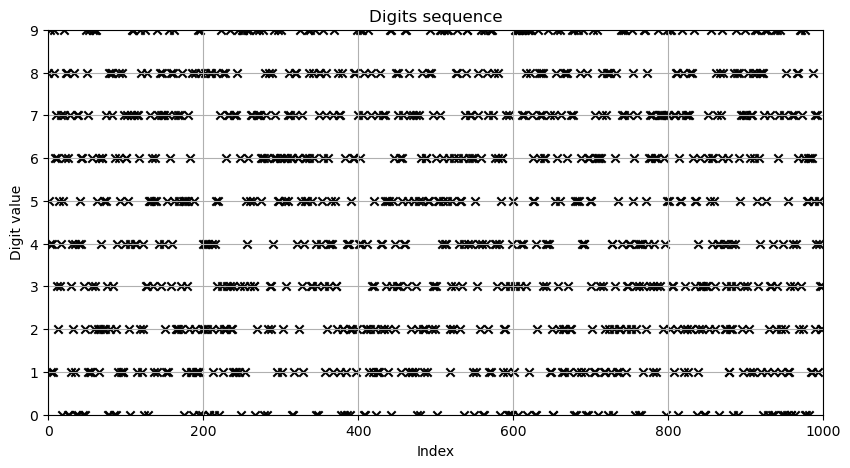

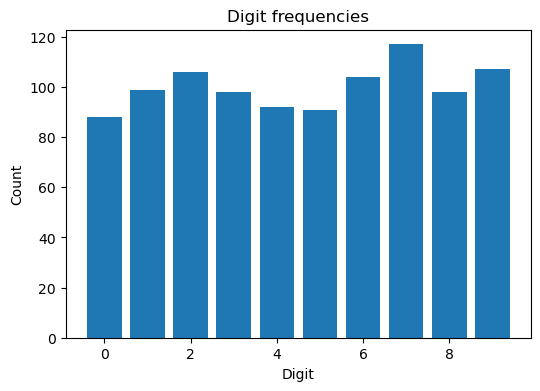

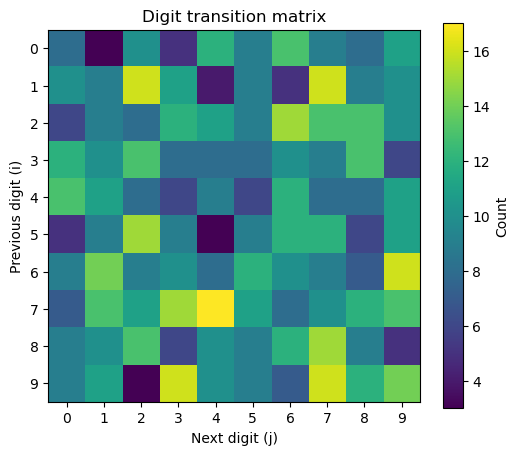

In [3]:
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.ylim(0, 9)
plt.xlim(0, nDigits)
for i in range(len(digits)):
    plt.scatter(i, digits[i], marker = "x", color = "Black")
plt.title("Digits sequence")
plt.xlabel("Index")
plt.ylabel("Digit value")
plt.show()

counts = [digits.count(i) for i in range(10)]
plt.figure(figsize = (6, 4))
plt.bar(range(10), counts)
plt.title("Digit frequencies")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

matrix = [[0 for n in range(10)] for m in range(10)]
for a, b in zip(digits[:-1], digits[1:]):
    matrix[a][b] += 1

plt.figure(figsize = (6, 5))
plt.imshow(matrix, cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(label = "Count")
plt.title("Digit transition matrix")
plt.xlabel("Next digit (j)")
plt.ylabel("Previous digit (i)")
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

# Powers

One approach is to use the digits of powers. This is of course not random, but it's a simple method of making random-like numbers so let's use that as a starting point. 

Our generator will make numbers from an index N, and our Nth number will be the last digit of (N + 2) ^ k where k is our special power. k is chosen so that all the powers will be long decimals. 

In [4]:
k = 2.718281828 #First few digits of e
def powerRNG(N):
    return(int(str((N + 2) ** k)[-1]))
digits = [powerRNG(N) for N in range(nDigits)]

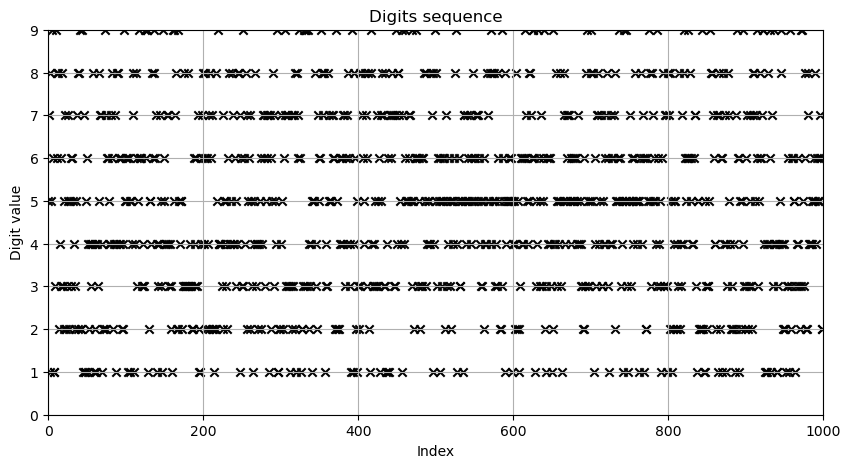

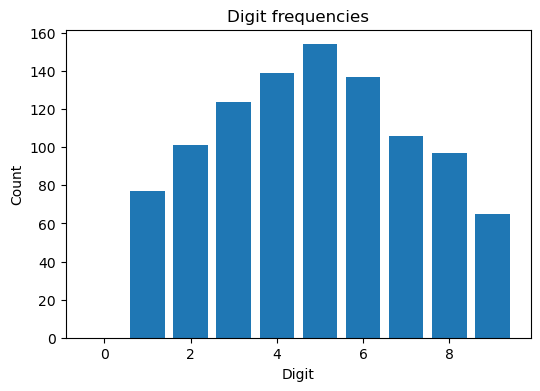

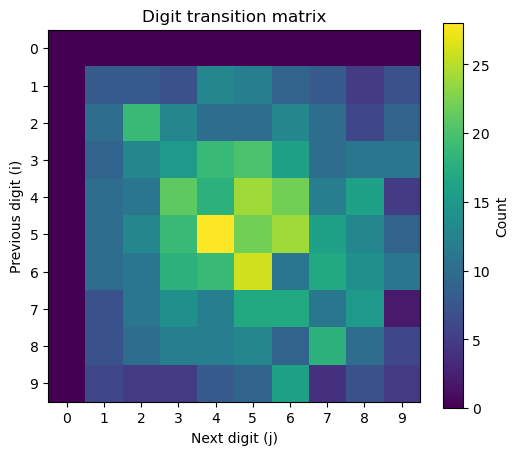

In [5]:
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.ylim(0, 9)
plt.xlim(0, nDigits)
for i in range(len(digits)):
    plt.scatter(i, digits[i], marker = "x", color = "Black")
plt.title("Digits sequence")
plt.xlabel("Index")
plt.ylabel("Digit value")
plt.show()

counts = [digits.count(i) for i in range(10)]
plt.figure(figsize = (6, 4))
plt.bar(range(10), counts)
plt.title("Digit frequencies")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

matrix = [[0 for n in range(10)] for m in range(10)]
for a, b in zip(digits[:-1], digits[1:]):
    matrix[a][b] += 1

plt.figure(figsize = (6, 5))
plt.imshow(matrix, cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(label = "Count")
plt.title("Digit transition matrix")
plt.xlabel("Next digit (j)")
plt.ylabel("Previous digit (i)")
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

That did work to give us random-looking numbers, but of course it wasn't random. If someone knows our k and which N we started with, they could predict our numbers! Also we never output 0 which isn't ideal either.

# Time

Let's make it harder to predict by using time! We'll use our digits of powers generator to generate three digits. Suppose they pick [3, 8, 5]. We'll then measure how long it takes our computer to do the factorial of 385, and our output will be the 8th decimal point of that time.

In [6]:
def factorial(x):
    if x == 0:
        return(1)
    else:
        return(x * factorial(x - 1))

def timeRNG(N):
    picks = [powerRNG(N + i) for i in range(3)]
    index = sum(picks[i] * 10 ** (i) for i in range(len(picks)))
    
    start1 = time.time()
    result = factorial(index)
    end1 = time.time()
    t1 = start1 - end1

    return(int(str(t1)[8]))

digits = [timeRNG(N) for N in range(nDigits)]

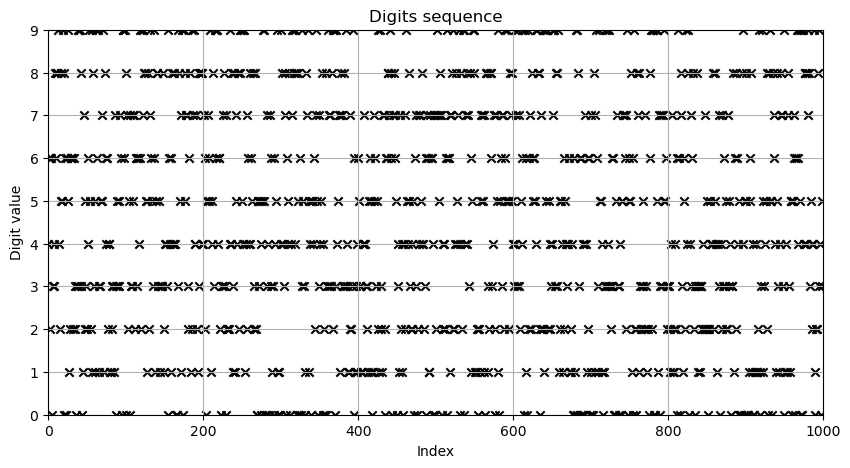

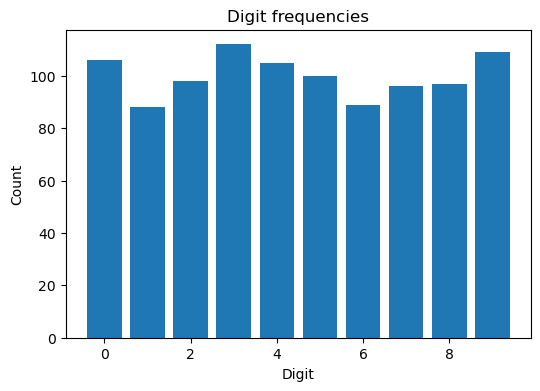

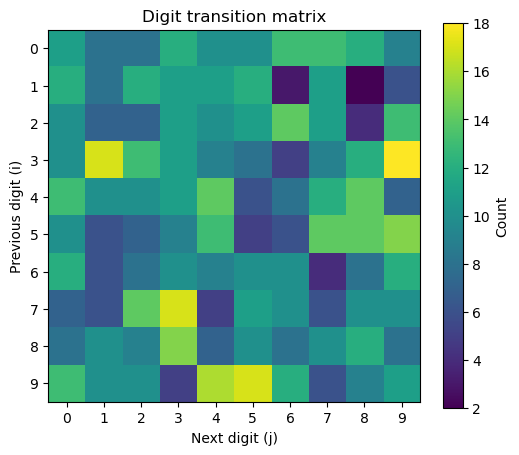

In [7]:
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.ylim(0, 9)
plt.xlim(0, nDigits)
for i in range(len(digits)):
    plt.scatter(i, digits[i], marker = "x", color = "Black")
plt.title("Digits sequence")
plt.xlabel("Index")
plt.ylabel("Digit value")
plt.show()

counts = [digits.count(i) for i in range(10)]
plt.figure(figsize = (6, 4))
plt.bar(range(10), counts)
plt.title("Digit frequencies")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

matrix = [[0 for n in range(10)] for m in range(10)]
for a, b in zip(digits[:-1], digits[1:]):
    matrix[a][b] += 1

plt.figure(figsize = (6, 5))
plt.imshow(matrix, cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(label = "Count")
plt.title("Digit transition matrix")
plt.xlabel("Next digit (j)")
plt.ylabel("Previous digit (i)")
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

TimeRNG did better than PowerRNG in that the digits were better distributed and we sometimes get 0 (powerRNG never gives 0) but it's still not perfect since a faster computer might take 0.0000000000001 seconds to perform small factorials and then our TimeRNG doesn't work! However, in such a case we can always replace factorial with some more computationally expensive function like bogosort so it's still potentially usable as long as we're aware of the possibility it will break on faster machines.

It's also much harder to predict, since in order to predict it you still need to know k but also you need to know the exact state of the computer that ran the program, which in practice is very hard to know. This code probably doesn't live up to very rigorous security standards, but as a bodge job it's not bad!